# Application of Genetic Algorithm and Neural Networks in Stock Trading

In [1]:
import numpy as np
from network import flatten_NN, reconstruct_NN
from typing import List, Tuple
from mate import mate
import pandas as pd
import matplotlib.pyplot as plt
from helper_module import split_train_set, split_train_test_sets
from numpy.typing import NDArray
from fitness import fitness, regime, compute_population_fitness, evaluate_nn
from initialize_nn import initialize_nn
from initialize_population import initialize_population
from selection import keep_elites, selection
import random
from mate import mate, reproduce_population, reduce_population
from checkpoint import checkpoint, load_checkpoint
from evolution import run_evolution
import os

/var/folders/z0/vn8ghqnn2sx5n3jbqtns9msr0000gq/T/ipykernel_7471/1270827766.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


                Close       Open       High        Low   Volume
Date                                                           
1986-01-02   172.6575   172.6575   172.6575   172.6575    600.0
1986-01-03   172.6575   172.6575   172.6575   172.6575   1900.0
1986-01-06   175.4879   175.4879   175.4879   175.4879   2800.0
1986-01-07   181.1488   175.4879   181.1488   175.4879   3200.0
1986-01-09   181.1488   181.1488   181.1488   181.1488   2600.0
...               ...        ...        ...        ...      ...
2023-09-12  1781.0000  1786.0000  1809.0000  1781.0000  12985.0
2023-09-13  1787.0000  1799.0000  1799.0000  1781.0000  16850.0
2023-09-14  1795.0000  1795.0000  1795.0000  1782.0000  12070.0
2023-09-15  1752.0000  1795.0000  1810.0000  1752.0000  29105.0
2023-09-18  1752.0000  1789.0000  1789.0000  1752.0000  27225.0

[8861 rows x 5 columns]


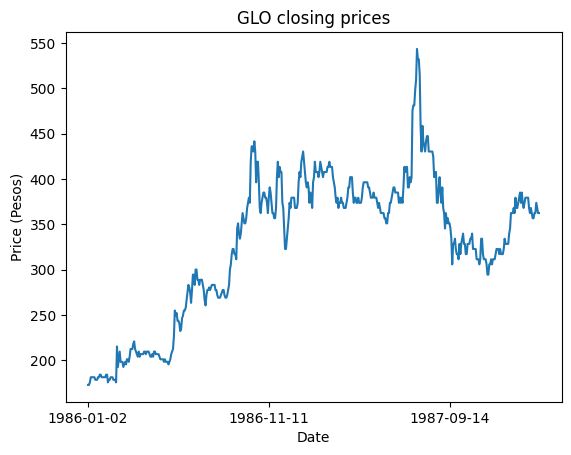

In [2]:
# read and print sample historical stock price data
series = pd.read_csv('../../Data/PH-historical-stock-price-data-csv/GLO.csv', header = 0, index_col = 'Date')
print(series)

# plot historical stock price data
fig, ax = plt.subplots()    
ax.set_title('GLO closing prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price (Pesos)')
ax.plot(series['Close'].head(500))
ax.set_xticks(ax.get_xticks()[::200])
plt.show()

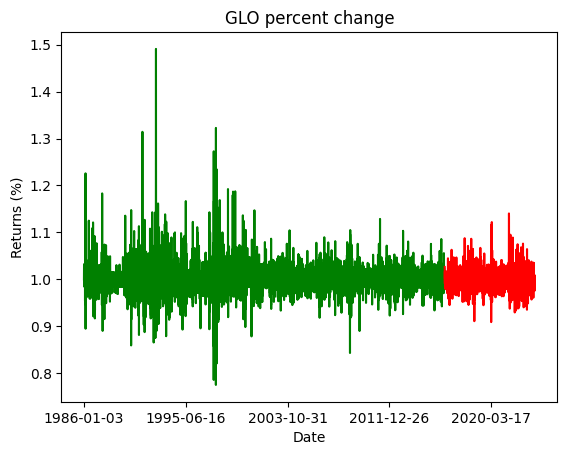

In [3]:
# use only the closing prices of the stock
series = series['Close']
series = series.pct_change(1) + 1
series = pd.Series(data = series, name = 'Close_pct_change')

# split data into train and test sets
train, test = split_train_test_sets(series)

# plot the train and test sets
fig, ax = plt.subplots()    
ax.set_title('GLO percent change')
ax.set_xlabel('Date')
ax.set_ylabel('Returns (%)')
ax.plot(train, 'g')
ax.plot(test, 'r')
ax.set_xticks(ax.get_xticks()[::2000])
plt.show()

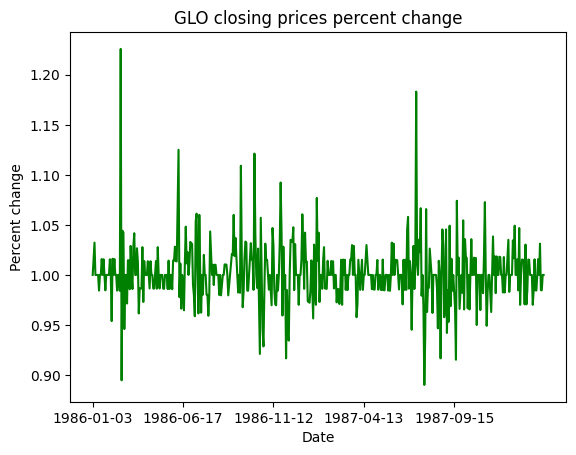

In [4]:
# split the train set into multiple batches
train_set = split_train_set(train)

# plot a sample of the train set
fig, ax = plt.subplots()    
ax.set_title('GLO closing prices percent change')
ax.set_xlabel('Date')
ax.set_ylabel('Percent change')
ax.plot(train_set[0], 'g')
ax.set_xticks(ax.get_xticks()[::100])
plt.show()

In [5]:
population = list()
population = initialize_population(num_individuals=100)
WINDOW = 150
MAX_POPULATION = 100
MUTATION_RATE = 0.1
NUM_GENERATIONS = 5
CHECKPOINT_FILEPATH = './checkpoint'
CHECKPOINT_INTERVAL = 10
ENABLE_HYPERMUTATION = True

# start from generation 0
population = run_evolution(population = population,
                           window = WINDOW, 
                           num_generations = NUM_GENERATIONS, 
                           train_set = train_set,
                           checkpoint_filepath = CHECKPOINT_FILEPATH,
                           checkpoint_interval = CHECKPOINT_INTERVAL,
                           mutation_rate = MUTATION_RATE,
                           enable_hypermutation = ENABLE_HYPERMUTATION)

Generation: 0 -> 42.84
Mutation rate: 0.10
Generation: 1 -> -6.99
Generation: 2 -> 62.40
Mutation rate: 0.10
Generation: 3 -> 2.31
Generation: 4 -> 1.43


In [6]:
# uncomment this cell if starting from a checkpoint
# population = load_checkpoint(checkpoint_filepath = './checkpoint/0.pkl')
# population = run_evolution(population = population,
#                            window = 150, 
#                            starting_generation = 1, 
#                            num_generations = NUM_GENERATIONS, 
#                            train_set = train_set, 
#                            checkpoint_filepath = './checkpoint',
#                            checkpoint_interval = 10,
#                            mutation_rate = MUTATION_RATE,
#                            enable_hypermutation = True)

In [7]:
for i in range(10):
    test_sample = np.zeros([1,150])
    for i in range(150):
        test_sample[0][i] = np.random.uniform(0,1)

    probabilities = population[0].propagate_forward(test_sample)
    index = np.argmax(probabilities)
    print(probabilities, index)

[[9.99999907e-01 9.25213584e-08 6.08714203e-15]] 0
[[9.80933397e-09 9.99999990e-01 4.49840558e-46]] 1
[[2.21408450e-03 1.66763783e-12 9.97785915e-01]] 2
[[2.89133903e-16 1.85654544e-13 1.00000000e+00]] 2
[[9.99988252e-01 1.17479485e-05 3.02197150e-10]] 0
[[9.99972882e-01 3.35556271e-06 2.37619437e-05]] 0
[[1.00000000e+00 7.68480417e-13 4.81409572e-31]] 0
[[3.82970131e-10 1.00000000e+00 9.62573302e-24]] 1
[[5.44984923e-13 9.95364027e-01 4.63597311e-03]] 1
[[7.28420415e-14 7.10001851e-01 2.89998149e-01]] 1


In [8]:
for individual in population:
    print(individual.fitness)

18.502821293967884
18.502821293967884
14.074380506282118
11.401535553666605
9.60812452780833
9.60812452780833
9.60812452780833
6.101631114834943
6.101631114834943
5.858558846020187


In [9]:
# from fitness import test_fitness
# test_fitness(nn = population[0], window = 150,  train_set = train_set[0], regime = regime)

In [10]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(series)

In [36]:
# test_fitness, test_bnh_returns, test_strat_returns, test_max_drawdown, test_series, test_strat_sortino_ratio, test_num_trades = evaluate_nn(nn = population[0], train_set = train_set[2500], regime = regime, window = 150)
# test_fitness, test_bnh_returns, test_strat_returns, test_max_drawdown, test_series, test_strat_sortino_ratio, test_num_trades = evaluate_nn(nn = population[2], train_set = train, regime = regime, window = 150)
test_fitness, test_bnh_returns, test_strat_returns, test_max_drawdown, test_series, test_strat_sortino_ratio, test_num_trades = evaluate_nn(nn = population[2], train_set = test, regime = regime, window = 150)

In [37]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(test_series)

            Close_pct_change  Regime   Returns  Cumulative_Returns
Date                                                              
2016-06-21          1.026316     NaN  1.000000            0.000000
2016-06-22          1.018803     NaN  1.000000            0.000000
2016-06-23          0.999161     NaN  1.000000            0.000000
2016-06-24          0.990764     NaN  1.000000            0.000000
2016-06-27          1.016949     NaN  1.000000            0.000000
2016-06-28          1.001667     NaN  1.000000            0.000000
2016-06-29          1.006656     NaN  1.000000            0.000000
2016-06-30          0.980165     NaN  1.000000            0.000000
2016-07-01          0.994941     NaN  1.000000            0.000000
2016-07-04          0.999153     NaN  1.000000            0.000000
2016-07-05          0.999152     NaN  1.000000            0.000000
2016-07-07          0.997453     NaN  1.000000            0.000000
2016-07-08          1.002553     NaN  1.000000            0.00

In [38]:
print(test_bnh_returns)
print(test_fitness)
print(test_strat_returns)
print(test_num_trades)
print(test_max_drawdown)

-23.157894736842223
233.13499073328114
5.579086172276693
85
0.5950245596205959


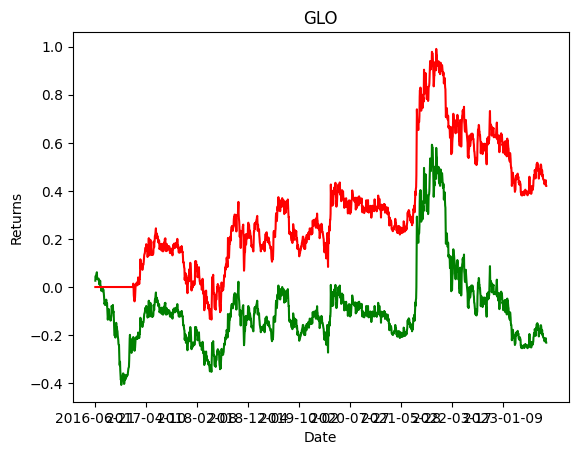

In [39]:
test_series['bnh'] = test_series['Close_pct_change'].cumprod() - 1

# plot historical stock price data
fig, ax = plt.subplots()    
ax.set_title('GLO')
ax.set_xlabel('Date')
ax.set_ylabel('Returns')
ax.plot(test_series.index, test_series['bnh'], color = 'g')
ax.plot(test_series.index, test_series['Cumulative_Returns'], color = 'r')
ax.set_xticks(ax.get_xticks()[::200])
plt.show()

In [34]:
# checkpoint(population = population, generation_number = 99999, checkpoint_filepath = './checkpoint')

In [35]:
# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# X = np.array([[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80]])
# clustering = DBSCAN(eps=3, min_samples=2).fit(X)
# print(clustering.labels_)
# DBSCAN(eps=3, min_samples=2)